# **IMPORTS**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KernelDensity
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error, r2_score
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean


---

# **CARGA DE DATOS**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
question_responses = pd.read_excel('/content/drive/MyDrive/2023-1/M2/Ospina_QuestionResponses_DIB.xlsx')
cyclists_database = pd.read_excel('/content/drive/MyDrive/2023-1/M2/Ospina_cyclists_BD_DIB.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
question_responses

,ID_BD,ID Form,Zone number,Zone North/Sotuh,Horodateur,Type of survey,Surveyor,Q.1,Q.2,Q.3,...,Q.17.,Q.18.,Q.19.,Q. 20.,Q.21.,Q.22.,Q.23.,Q.23.1,Q.24.,Q.24.1
0,1,1009,1,North,42754.398372,Telephone survey,Carolina Giraldo Herrera,Yes,1,No,...,"3_Yes, partially","3_Yes, the whole existing cyclepath","\nStarts at Acevedo Station, take carrera 52 t...",1_It is the fastest one (most direct),6_More than 5,1_Yes,3_Metro,1_Yes,"1_No, I only used the bicycle",None
1,2,10291,1,North,42754.416717,Telephone survey,Carolina Giraldo Herrera,Yes,2,Yes,...,"3_Yes, partially","3_Yes, the whole existing cyclepath","\nMoravia, Parque Explora, Carabobo, UdeA by t...",1_It is the fastest one (most direct),6_More than 5,1_Yes,3_Metro,1_Yes,"1_No, I only used the bicycle",None
2,3,10292,1,North,42755.685511,Telephone survey,Carolina Giraldo Herrera,Yes,2,Yes,...,"1_No , there is not",1_Never,"From the El Bosque neighborhood, I take Calle ...",1_It is the fastest one (most direct),6_More than 5,1_Yes,"2_Taxi, 3_Metro",1_Yes,"1_No, I only used the bicycle",None
3,4,1002,1,North,42755.709158,Telephone survey,Carolina Giraldo Herrera,Yes,1,Yes,...,"1_No , there is not",1_Never,\nI go down 4 blocks down 121st Street from th...,1_It is the fastest one (most direct),5,1_Yes,3_Metro,1_Yes,"1_No, I only used the bicycle",None
4,5,1006,3,North,42755.732869,Telephone survey,Carolina Giraldo Herrera,Yes,2,Yes,...,"3_Yes, partially",1_Never,"\nI go down Calle 49 to Carrera 39, then Calle...",1_It is the fastest one (most direct),5,1_Yes,3_Metro,2_No,"1_No, I only used the bicycle",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,806,8638,3,North,NaN,Internet survey,NaN,Yes,1,Yes,...,"2_Yes, along the whole path","3_Yes, the whole existing cyclepath",Exit from the siu to the university city udea,1_It is the fastest one (most direct),2,1_Yes,7_None of the above,2_No,"1_No, I only used the bicycle",None
806,807,8643,2,North,NaN,Internet survey,NaN,Yes,2,Yes,...,"3_Yes, partially","2_Yes, partially",I take the North Highway to the National Unive...,1_It is the fastest one (most direct),5,1_Yes,"1_Bus, 3_Metro, 4_Car, 5_Motorcycle",1_Yes,"2_Yes, in the stage before using the bicycle",Bus
807,808,8644,6,South,NaN,Internet survey,NaN,Yes,2,Yes,...,"3_Yes, partially","3_Yes, the whole existing cyclepath","I start in race 70, then I go down the 30A, I ...",3_It is the safest with respect to traffic,2,1_Yes,"1_Bus, 2_Taxi, 3_Metro, 4_Car, 5_Motorcycle",1_Yes,"1_No, I only used the bicycle",None
808,809,8645,4,South,NaN,Internet survey,NaN,Yes,2,Yes,...,"3_Yes, partially","2_Yes, partially","I leave my house, close to the church of Santa...",1_It is the fastest one (most direct),2,1_Yes,2_Taxi,1_Yes,"1_No, I only used the bicycle",None


In [ ]:
cyclists_database

,route,length_km,ln_length,d_eucli,z_from_m,z_to_m,stratum,MDE_zone,o_comuna,d_comuna,...,d_bsindex,d_Hls,d_Lls,r_i_tflights,r_detour,r_pLU_Hmix,r_LCycle,r_Hls,r_Lls,g_elevat
0,1002,8.900819,2.186143,7661.575684,1559.070778,1498.018619,1,1,2,11,...,1.768388,13.221455,9,6.000042,1.161748,0.050068,0.000000,7.967382,0.933437,0.135921
1,1006,3.298233,1.193387,2264.198975,1565.995455,1499.222316,1,3,9,10,...,0.884194,16.857681,8,17.000084,1.456689,0.757808,0.895119,1.890346,0.512768,0.036111
2,1009,8.830850,2.178251,7938.677246,1470.921865,1503.000000,2,1,5,14,...,0.000000,10.788778,4,38.999680,1.112383,0.560512,4.545725,3.229477,1.055648,0.131702
3,1050,11.113341,2.408146,6329.648926,1610.800837,1867.908723,3,2,7,1,...,0.000000,4.411223,12,24.999462,1.755760,0.133546,0.124635,10.988706,0.000000,0.547815
4,1052,7.158739,1.968334,3002.985596,1596.978959,1485.130070,3,3,9,4,...,0.884194,11.702364,5,23.999673,2.383874,0.464759,0.101641,6.781654,0.275444,0.137033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,8646,4.408962,1.483639,3265.699707,1481.300036,1550.136110,3,2,5,7,...,0.000000,7.339918,3,8.000061,1.350082,0.157565,0.000000,4.408962,0.000000,0.089267
806,10291,2.480600,0.908501,2331.775635,1481.935240,1511.645773,1,1,4,10,...,4.420971,12.879885,7,14.999942,1.063825,0.447561,1.290217,1.077576,0.112807,0.024014
807,10292,1.739301,0.553483,1429.687744,1482.000000,1516.001752,1,1,4,5,...,0.000000,8.750595,5,4.000044,1.216560,0.309740,0.000000,1.532711,0.206591,0.039647
808,30041,3.713835,1.312065,2956.851318,1676.279967,1478.343301,2,2,6,7,...,0.000000,17.023154,2,9.000108,1.256010,0.072540,0.000000,3.173722,0.540113,0.019323


---

# **Análisis de las tablas**

## Tabla "QuestionResponses"

In [ ]:
question_responses.columns

Index(['ID_BD', 'ID Form', 'Zone number', 'Zone North/Sotuh', 'Horodateur',
       'Type of survey', 'Surveyor', 'Q.1', 'Q.2 ', 'Q.3 ', 'Q.3.1', 'Q.4. ',
       'Q.5. ', 'Q6. ', 'Q.7. ', 'Stratum', 'Q.8.', 'Q.9. ', 'Q.10.', 'Q.11.',
       'Q.12.', 'Q.12.1 ', 'Q.13.', 'Q.13.1 Hour', 'Q.13.2 Minutes', 'Q.14. ',
       'Q.15.1 Municipality of origin', 'Q.15.2. Comuna',
       'Q.15.3. Neighborhood', 'Q. 15.4. Address',
       'Q. 15.5. Place of reference', 'Q.16.1 Municipality of destiantion',
       'Q.16.2. Address/Place of reference destination',
       'Q.16.2. Neighborhood/Place of reference destination', 'Q.17. ',
       'Q.18. ', 'Q.19. ', 'Q. 20. ', 'Q.21. ', 'Q.22. ', 'Q.23. ', 'Q.23.1',
       'Q.24. ', 'Q.24.1 '],
      dtype='object')

In [ ]:
question_responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 44 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   ID_BD                                                810 non-null    int64  
 1   ID Form                                              810 non-null    object 
 2   Zone number                                          810 non-null    int64  
 3   Zone North/Sotuh                                     810 non-null    object 
 4   Horodateur                                           128 non-null    float64
 5   Type of survey                                       810 non-null    object 
 6   Surveyor                                             128 non-null    object 
 7   Q.1                                                  810 non-null    object 
 8   Q.2                                                  810 non-null    i

In [ ]:
question_responses.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_BD,810.0,405.500000,233.971152,1.000000,203.250000,405.500000,607.750000,810.000000
Zone number,810.0,3.774074,1.496455,1.000000,3.000000,4.000000,4.000000,6.000000
Horodateur,128.0,42767.170881,9.146349,42754.398372,42758.726224,42767.815463,42771.801592,42783.330081
Q.2,810.0,1.412346,0.669184,1.000000,1.000000,1.000000,2.000000,5.000000
Q.7.,810.0,3.554321,1.125120,1.000000,3.000000,4.000000,4.000000,6.000000
Q.13.1 Hour,810.0,6.641975,2.280723,1.000000,5.250000,7.000000,8.000000,12.000000
Q.13.2 Minutes,810.0,20.198765,16.113051,0.000000,0.000000,20.000000,30.000000,56.000000
Q.14.,810.0,21.903704,10.537735,3.000000,15.000000,20.000000,30.000000,75.000000
Q.15.2. Comuna,810.0,10.779012,3.683297,1.000000,10.000000,11.000000,13.000000,16.000000


In [ ]:
valores_faltantes_preguntas = question_responses.isna().sum()
valores_faltantes_preguntas = pd.DataFrame(valores_faltantes_preguntas, columns=['Amount'])
valores_faltantes_preguntas['Percentage'] = valores_faltantes_preguntas['Amount'] / question_responses.shape[0] * 100
valores_faltantes_preguntas

,Amount,Percentage
ID_BD,0,0.000000
ID Form,0,0.000000
Zone number,0,0.000000
Zone North/Sotuh,0,0.000000
Horodateur,682,84.197531
Type of survey,0,0.000000
Surveyor,682,84.197531
Q.1,0,0.000000
Q.2,0,0.000000
Q.3,0,0.000000


## Tabla "CyclistsDB"

In [ ]:
cyclists_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   route            810 non-null    int64  
 1   length_km        810 non-null    float64
 2   ln_length        810 non-null    float64
 3   d_eucli          810 non-null    float64
 4   z_from_m         810 non-null    float64
 5   z_to_m           810 non-null    float64
 6   stratum          810 non-null    int64  
 7   MDE_zone         810 non-null    int64  
 8   o_comuna         810 non-null    int64  
 9   d_comuna         810 non-null    int64  
 10  age              810 non-null    int64  
 11  bgender          810 non-null    int64  
 12  bHinc            810 non-null    int64  
 13  bMinc            810 non-null    int64  
 14  bLinc            810 non-null    int64  
 15  bwork            810 non-null    int64  
 16  bstudy           810 non-null    int64  
 17  bbothpurp       

In [ ]:
cyclists_database.describe().T

,count,mean,std,min,25%,50%,75%,max
route,810.0,19904.548148,400042.937645,1002.000000,5192.250000,5581.000000,6007.750000,1.139114e+07
length_km,810.0,4.168267,2.138710,0.670043,2.578135,3.832022,5.466936,1.258281e+01
ln_length,810.0,1.280207,0.573767,-0.400413,0.947066,1.343386,1.698718,2.532331e+00
d_eucli,810.0,3128.536069,1654.357558,522.919434,1944.661224,2812.193848,4158.087402,1.097761e+04
z_from_m,810.0,1537.511574,52.798655,1467.270554,1504.978364,1522.759512,1550.175170,1.915270e+03
z_to_m,810.0,1506.378981,29.439970,1462.133723,1489.933330,1492.349205,1517.978768,1.867909e+03
stratum,810.0,3.554321,1.125120,1.000000,3.000000,4.000000,4.000000,6.000000e+00
MDE_zone,810.0,3.828395,1.500370,1.000000,3.000000,4.000000,5.000000,6.000000e+00
o_comuna,810.0,10.854321,3.689897,1.000000,10.000000,11.000000,14.000000,1.600000e+01
d_comuna,810.0,8.809877,3.324762,1.000000,7.000000,10.000000,11.000000,1.600000e+01


In [ ]:
valores_faltantes_DB = cyclists_database.isna().sum()
valores_faltantes_DB = pd.DataFrame(valores_faltantes_DB, columns=['Amount'])
valores_faltantes_DB['Percentage'] = valores_faltantes_DB['Amount'] / cyclists_database.shape[0] * 100
valores_faltantes_DB

,Amount,Percentage
route,0,0.0
length_km,0,0.0
ln_length,0,0.0
d_eucli,0,0.0
z_from_m,0,0.0
z_to_m,0,0.0
stratum,0,0.0
MDE_zone,0,0.0
o_comuna,0,0.0
d_comuna,0,0.0


# Unión de la tabla "cyclistDB" con algunas de las columnas de "QuestionResponses"

In [ ]:
datos = pd.concat([cyclists_database, question_responses[['Q.13.', 'Q.13.1 Hour', 'Q.13.2 Minutes',
                                                          'Q.14. ', 'Q.17. ', 'Q.18. ']]], axis=1)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   route            810 non-null    int64  
 1   length_km        810 non-null    float64
 2   ln_length        810 non-null    float64
 3   d_eucli          810 non-null    float64
 4   z_from_m         810 non-null    float64
 5   z_to_m           810 non-null    float64
 6   stratum          810 non-null    int64  
 7   MDE_zone         810 non-null    int64  
 8   o_comuna         810 non-null    int64  
 9   d_comuna         810 non-null    int64  
 10  age              810 non-null    int64  
 11  bgender          810 non-null    int64  
 12  bHinc            810 non-null    int64  
 13  bMinc            810 non-null    int64  
 14  bLinc            810 non-null    int64  
 15  bwork            810 non-null    int64  
 16  bstudy           810 non-null    int64  
 17  bbothpurp       

In [ ]:
valores_faltantes = datos.isna().sum()
valores_faltantes = pd.DataFrame(valores_faltantes, columns=['Amount'])
valores_faltantes

,Amount
route,0
length_km,0
ln_length,0
d_eucli,0
z_from_m,0
z_to_m,0
stratum,0
MDE_zone,0
o_comuna,0
d_comuna,0


In [ ]:
valores_faltantes.value_counts()

Amount
0         54
dtype: int64

In [ ]:
pd.concat([datos.min(), datos.max()], axis=1)

,0,1
route,1002,11391140
length_km,0.670043,12.582808
ln_length,-0.400413,2.532331
d_eucli,522.919434,10977.611328
z_from_m,1467.270554,1915.269837
z_to_m,1462.133723,1867.908723
stratum,1,6
MDE_zone,1,6
o_comuna,1,16
d_comuna,1,16


# Manejo de las características en la tabla

Se pueden eliminar columnas poco relevantes como route, MDE_zone

In [ ]:
datos.columns

Index(['route', 'length_km', 'ln_length', 'd_eucli', 'z_from_m', 'z_to_m',
       'stratum', 'MDE_zone', 'o_comuna', 'd_comuna', 'age', 'bgender',
       'bHinc', 'bMinc', 'bLinc', 'bwork', 'bstudy', 'bbothpurp', 'bpubbike',
       'bpribike', 'bbothbike', 'frecweek', 'bdispo_tp', 'bdispo_pv',
       'bintermodalidad', 'bretour', 'o_i_dens', 'o_km_dens', 'o_cbd',
       'o_pLU_Hmix', 'o_LCycle', 'o_bsindex', 'o_Hls', 'o_Lls', 'd_i_dens',
       'd_km_dens', 'd_pLU_Hmix', 'd_LCycle', 'd_bsindex', 'd_Hls', 'd_Lls',
       'r_i_tflights', 'r_detour', 'r_pLU_Hmix', 'r_LCycle', 'r_Hls', 'r_Lls',
       'g_elevat', 'Q.13.', 'Q.13.1 Hour', 'Q.13.2 Minutes', 'Q.14. ',
       'Q.17. ', 'Q.18. '],
      dtype='object')

In [ ]:
datos['Q.13.'] = datos['Q.13.'].map({'am': 0, 'pm': 1})

In [ ]:
datos['Q.18. '] = datos['Q.18. '].map({'1_Never': 1, '2_Yes, partially': 2, '3_Yes, the whole existing cyclepath':3})

In [ ]:
datos['Q.17. '] = datos['Q.17. '].map({'1_No , there is not': 1, '2_Yes, along the whole path': 2, '3_Yes, partially':3, '4_I do not know':4})

In [ ]:
salida = datos['Q.14. ']

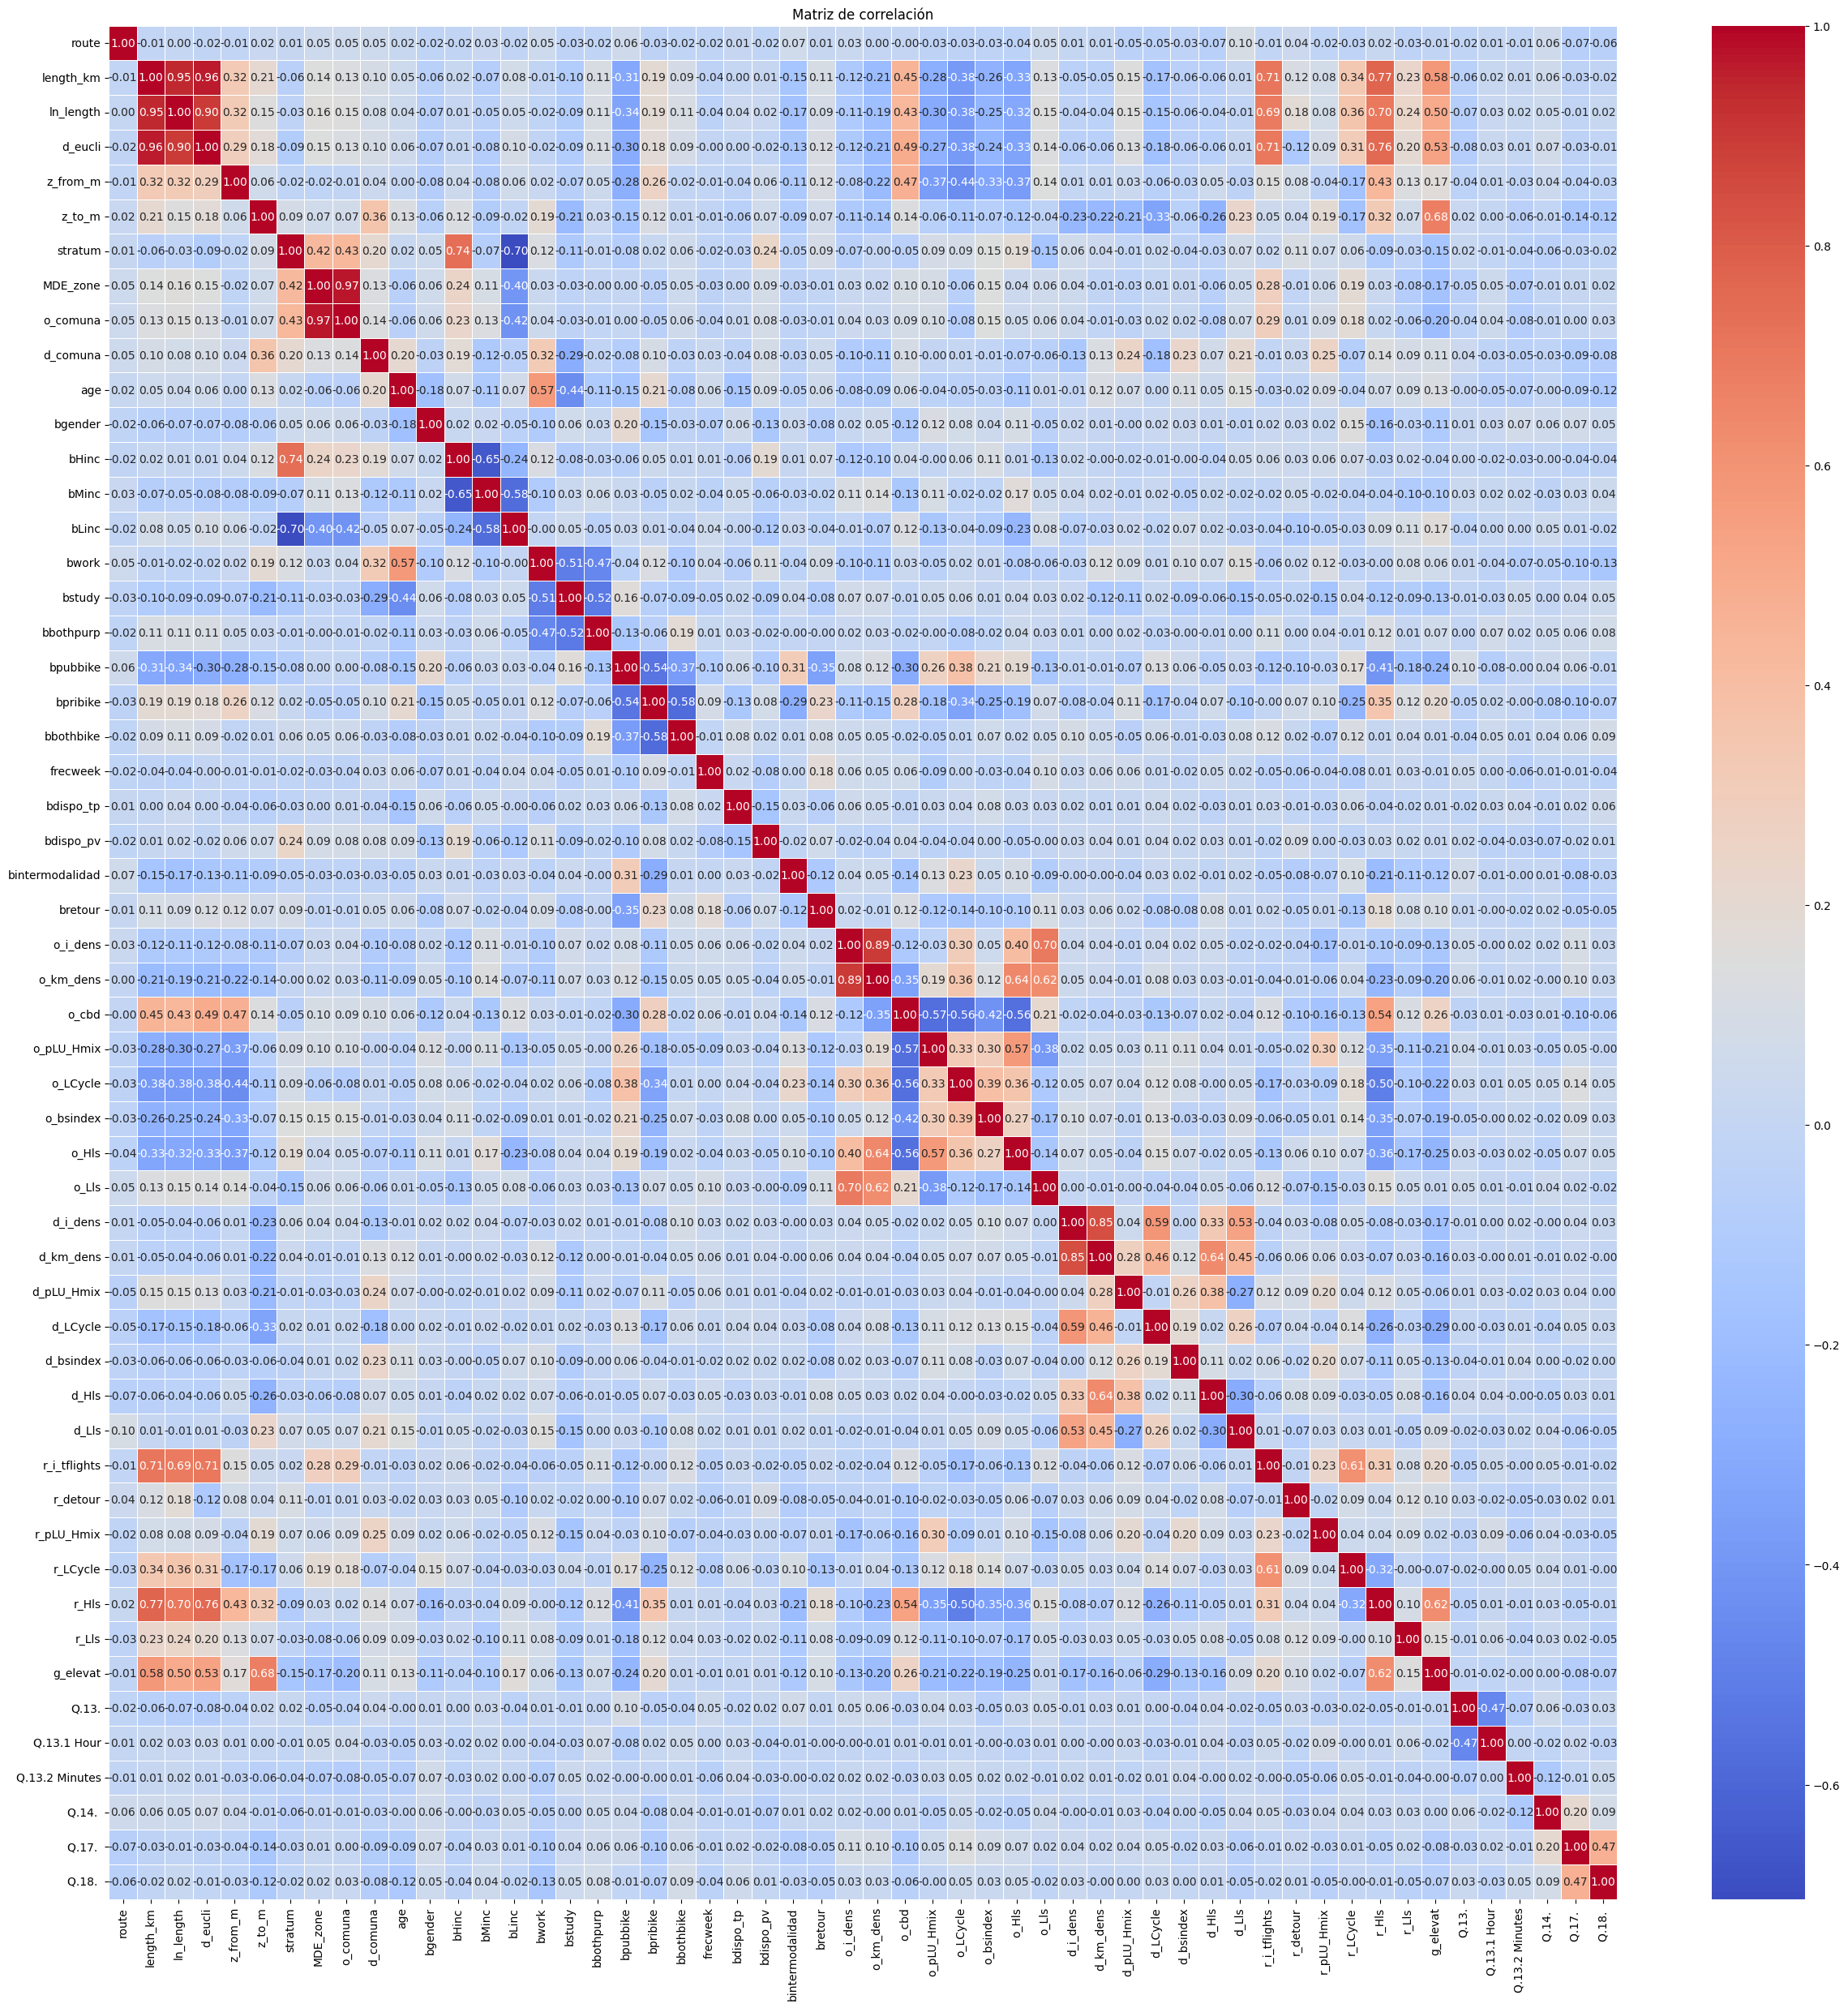

In [ ]:
correlacion = datos.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

Se seleccionan las columnas a usar

In [ ]:
variables_seleccionadas = ['ln_length', 'z_from_m', 'stratum',
       'o_comuna', 'd_comuna', 'age', 'bgender', 'bMinc', 'bLinc',
       'bwork', 'bstudy', 'bbothpurp', 'bpubbike', 'bpribike', 'bbothbike',
       'frecweek', 'bdispo_tp', 'bdispo_pv', 'bintermodalidad', 'bretour',
       'o_i_dens', 'o_km_dens',  'o_pLU_Hmix', 'o_LCycle', 'o_bsindex',
       'o_Hls', 'o_Lls', 'd_i_dens', 'd_km_dens', 'd_pLU_Hmix', 'd_LCycle',
        'd_Hls', 'd_Lls', 'r_i_tflights', 'r_detour', 'r_pLU_Hmix',
       'r_LCycle', 'r_Hls', 'r_Lls', 'g_elevat', 'Q.13.', 'Q.13.1 Hour',
       'Q.13.2 Minutes', 'Q.14. ', 'Q.17. ', 'Q.18. ']

In [ ]:
datos_filtrados = datos[variables_seleccionadas]


In [ ]:
datos_filtrados = datos_filtrados.drop(columns=['Q.14. '])

# Análisis de valores atípicos

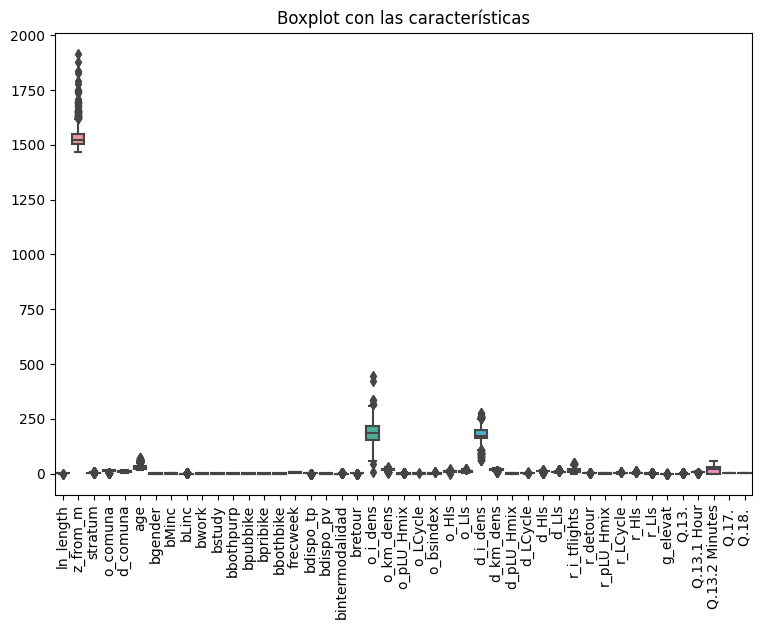

In [ ]:
plt.figure(figsize=(9,6))
plt.title('Boxplot con las características')
ax = sns.boxplot(data= datos_filtrados)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

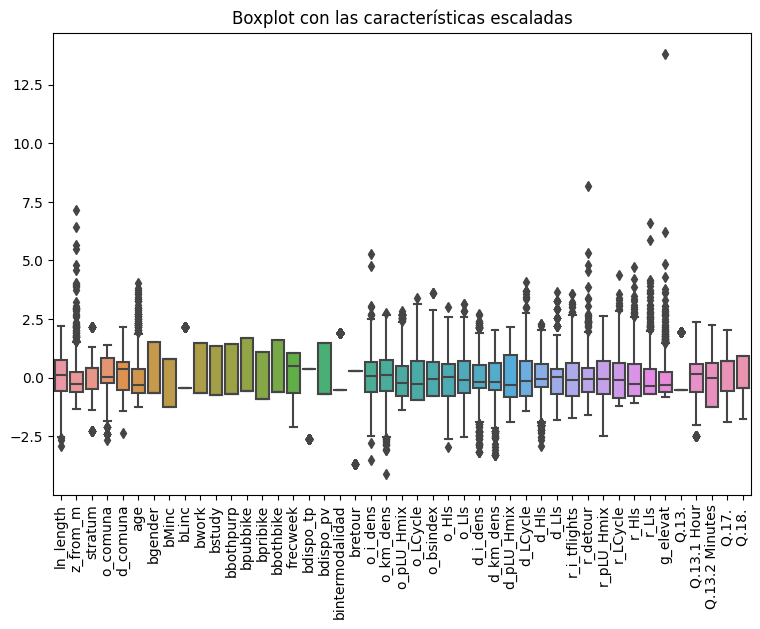

In [ ]:
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos_filtrados)
datos_escalados = pd.DataFrame(datos_escalados, columns=datos_filtrados.columns)

plt.figure(figsize=(9,6))
plt.title('Boxplot con las características escaladas')
ax = sns.boxplot(data= datos_escalados)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
media = datos_escalados.mean()
desviacion_estandar = datos_escalados.std()

# Calcular los límites superiores e inferiores
limite_superior = media + 3 * desviacion_estandar
limite_inferior = media - 3 * desviacion_estandar

# Identificar las filas que superan los límites en cada columna
filas = ((datos_escalados > limite_superior) | (datos_escalados < limite_inferior)).any(axis=1)

atipicos = np.array(filas)
no_atipicos = [not valor for valor in atipicos]

In [ ]:
print('Número de valores atípicos: ', atipicos.sum())

Número de valores atípicos:  158


In [ ]:
datos_no_atipicos = datos_filtrados[no_atipicos]
salida_2 = salida[no_atipicos]

---

# **ENTRENAR Y PREDICCION**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(datos_no_atipicos, salida_2, test_size=0.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(datos_no_atipicos)

StandardScaler()

In [ ]:
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

## Regresion multiple

In [ ]:
regression = LinearRegression()
regression.fit(X_train_scaled, Y_train)
y_regression = regression.predict(X_test_scaled)

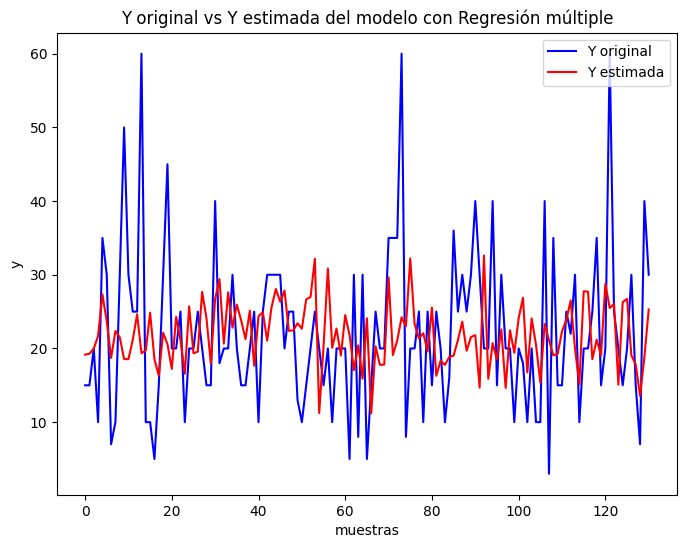

In [ ]:
fig = plt.figure(figsize=(8,6))
line_1 = plt.plot(np.arange(len(Y_test)), Y_test, 
                  color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(y_regression)), y_regression, 
                  color = 'r', label='Y estimada') 

plt.legend()
plt.title('Y original vs Y estimada del modelo con Regresión múltiple') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

## Ventana de Parzen

In [ ]:
def kernel_gaussiano(x):
    return (np.exp((-0.5)*x**2))

def ventana_parzen(xi, X, h, Y=None):
    nro_muestras = X.shape[0]
    suma = 0
    for k in range(nro_muestras):
        u = euclidean(xi, X[k,:])
        if Y is None:
            suma += kernel_gaussiano(u/h)
        else:
            suma += kernel_gaussiano(u/h)*Y[k]
    if(suma==0):
      suma = 1e-10
    return suma

def Nadaraya_Watson(h, Xtrain, Ytrain, Xtest):
    Xtrain = np.array(Xtrain)
    Xtest = np.array(Xtest)
    Ytrain = np.array(Ytrain)

    Ypred = np.zeros(Xtest.shape[0])

    for i in range(len(Xtest)):
      Ypred[i] = ventana_parzen(Xtest[i], Xtrain, h, Ytrain) / ventana_parzen(Xtest[i], Xtrain, h)
    
    return Ypred

In [ ]:
y_parzen = Nadaraya_Watson(0.5, X_train_scaled, Y_train, X_test_scaled)

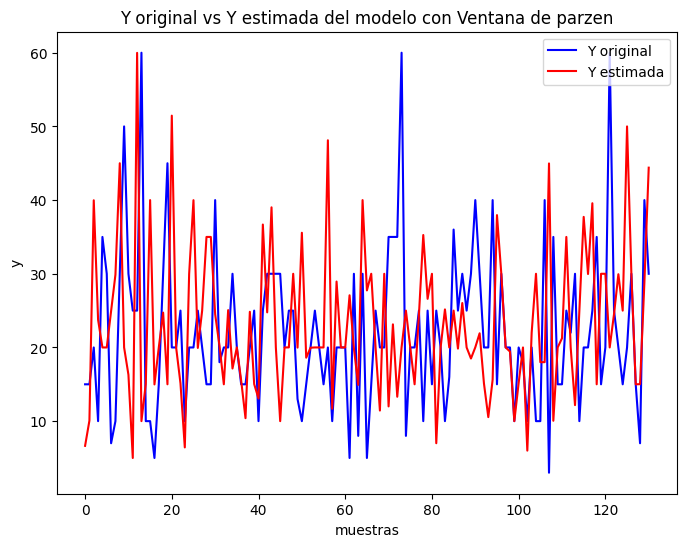

In [ ]:
fig = plt.figure(figsize=(8,6))
line_1 = plt.plot(np.arange(len(Y_test)), Y_test, 
                  color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(y_parzen)), y_parzen, 
                  color = 'r', label='Y estimada') 

plt.legend()
plt.title('Y original vs Y estimada del modelo con Ventana de parzen') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

## Random forest

Mejores parametros

In [ ]:
parameters = {
            'n_estimators' : [25, 50, 75],
            'max_depth' : [6,12,18]
             }
grid_search_cv = GridSearchCV(RandomForestRegressor(), parameters)
grid_search_cv.fit(X_train_scaled, Y_train)
grid_search_cv.best_params_

{'max_depth': 6, 'n_estimators': 75}

In [ ]:
rf = RandomForestRegressor(n_estimators=75,
                          max_depth=6, random_state=0)
rf.fit(X_train_scaled, Y_train)
y_rf = rf.predict(X_test_scaled)

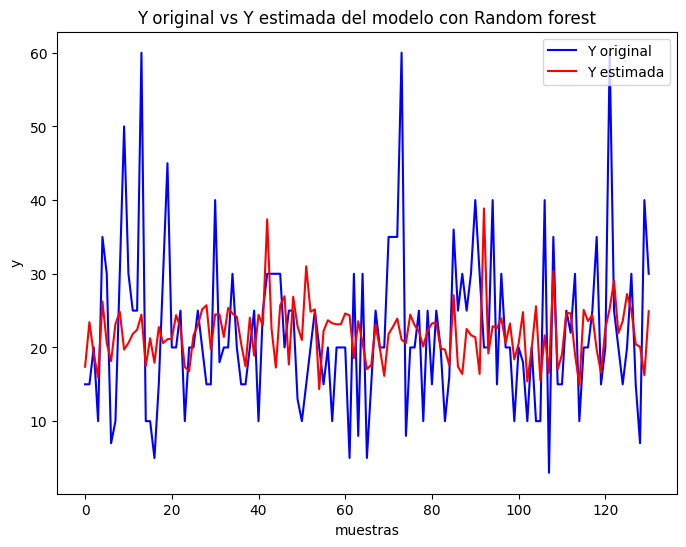

In [ ]:
fig = plt.figure(figsize=(8,6))
line_1 = plt.plot(np.arange(len(Y_test)), Y_test, 
                  color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(y_rf)), y_rf, 
                  color = 'r', label='Y estimada') 

plt.legend()
plt.title('Y original vs Y estimada del modelo con Random forest') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

## Redes Neuronales Artificiales

In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_scaled)
# X_test_scaled = scaler.transform(X_test_scaled)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, Y_train, epochs=100, batch_size=32, verbose=0)

y_rna = model.predict(X_test_scaled).flatten()

5/5 [==============================] - 0s 2ms/step


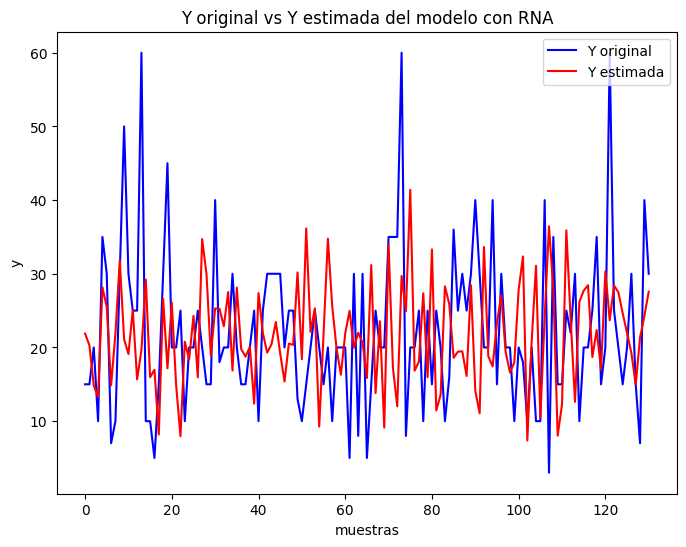

In [ ]:
fig = plt.figure(figsize=(8,6))
line_1 = plt.plot(np.arange(len(Y_test)), Y_test, 
                  color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(y_rna)), y_rna, 
                  color = 'r', label='Y estimada') 

plt.legend()
plt.title('Y original vs Y estimada del modelo con RNA') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

## Regresión por Vectores de Soporte con kernel RBF

Mejores parametros

In [ ]:
parameters = {
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01,0.1, 10],
    'C': [0.1, 1.0],
            'epsilon': [0.004, 0.008, 0.0004, 0.0008]
             }
grid_search_cv = GridSearchCV(SVR(), parameters)
grid_search_cv.fit(X_train_scaled, Y_train)
grid_search_cv.best_params_

{'C': 1.0, 'epsilon': 0.008, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
svm = SVR(kernel='rbf', gamma=0.01, C=1.0, epsilon=0.008)
svm.fit(X_train_scaled, Y_train)
y_svr = svm.predict(X_test_scaled)

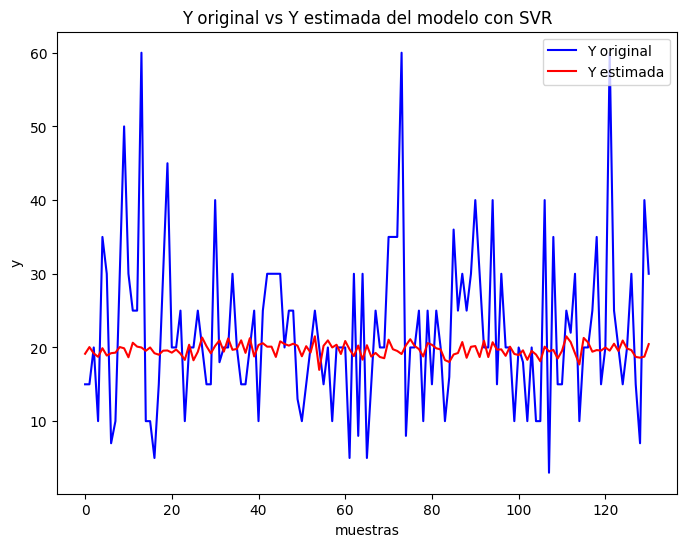

In [ ]:
fig = plt.figure(figsize=(8,6))
line_1 = plt.plot(np.arange(len(Y_test)), Y_test, 
                  color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(y_svr)), y_svr, 
                  color = 'r', label='Y estimada') 

plt.legend()
plt.title('Y original vs Y estimada del modelo con SVR') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

---

## **DESEMPEÑO**

In [ ]:
def desempenio (y_pred):
  mae = mean_absolute_error(Y_test, y_pred)
  mape = mean_absolute_percentage_error(Y_test, y_pred)
  mse = mean_squared_error(Y_test, y_pred)
  rmse = mean_squared_error(Y_test, y_pred, squared=False)
  r2 = r2_score(Y_test, y_pred)

  print("MAE: ", mae)
  print("MAPE", mape)
  print("MSE", mse)
  print("RMSE", rmse)
  print("R2", r2)

In [ ]:
desempenio(y_regression)

MAE:  8.736386362679841
MAPE 0.5373187886427195
MSE 123.5284328816492
RMSE 11.114334567649527
R2 -0.06978739041936288


In [ ]:
desempenio(y_parzen)

MAE:  11.685864894876039
MAPE 0.7446799432450878
MSE 239.39343128467945
RMSE 15.472344078538308
R2 -1.0732075050522178


In [ ]:
desempenio(y_rf)

MAE:  7.961670571041362
MAPE 0.48908473536593633
MSE 112.97574354327098
RMSE 10.629004823748598
R2 0.021601561305021222


In [ ]:
desempenio(y_rna)

MAE:  10.17557262464334
MAPE 0.651835424891459
MSE 164.68376597127505
RMSE 12.832917282180036
R2 -0.4262029569470511


In [ ]:
desempenio(y_svr) 

MAE:  7.845637953741016
MAPE 0.4620660922644326
MSE 120.23996113530112
RMSE 10.965398357346674
R2 -0.04130839553594168


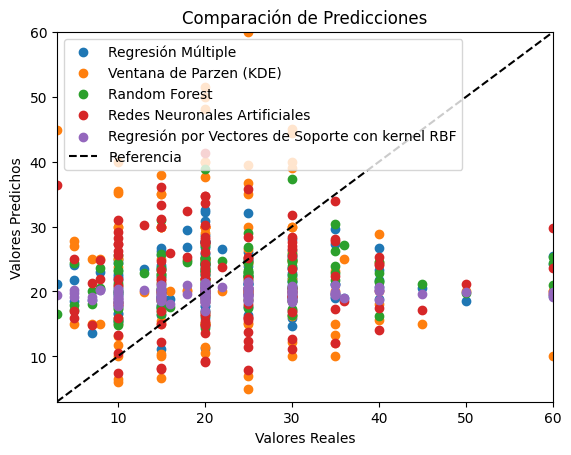

In [ ]:
fig, ax = plt.subplots()

y_ref = np.linspace(min(Y_test), max(Y_test), 100)

ax.scatter(Y_test, y_regression, label='Regresión Múltiple')
ax.scatter(Y_test, y_parzen, label='Ventana de Parzen (KDE)')
ax.scatter(Y_test, y_rf, label='Random Forest')
ax.scatter(Y_test, y_rna, label='Redes Neuronales Artificiales')
ax.scatter(Y_test, y_svr, label='Regresión por Vectores de Soporte con kernel RBF')

ax.plot(y_ref, y_ref, color='black', linestyle='--', label='Referencia')

# Configurar etiquetas y título del gráfico
ax.set_xlabel('Valores Reales')
ax.set_ylabel('Valores Predichos')
ax.set_title('Comparación de Predicciones')

# Mostrar la leyenda
ax.legend()

# Ajustar los límites del eje x e y para una mejor visualización
ax.set_xlim(min(Y_test), max(Y_test))
ax.set_ylim(min(Y_test), max(Y_test))

# Mostrar la gráfica
plt.show()

In [ ]:
y_regression_list = y_regression.tolist()
y_parzen_list = y_parzen.tolist()
y_rf_list = y_rf.tolist()
y_rna_list = y_rna.tolist()
y_svr_list = y_svr.tolist()
y_test_array = Y_test.tolist()

print(y_regression_list)
print(y_parzen_list)
print(y_rf_list)
print(y_rna_list)
print(y_svr_list)
print(y_test_array)






[19.163005103187903, 19.279765843380662, 19.963064529212307, 21.720264816592845, 27.333858411178106, 23.658710303542797, 18.722125879148187, 22.374055071628227, 21.51631446737526, 18.561582631526765, 18.554902107764477, 21.19083498761744, 24.62819587952354, 19.350795842800764, 19.728256200538762, 24.847797107321174, 18.523570548946825, 16.304578873316878, 22.12828937320702, 20.59604194746078, 17.219722882741713, 24.282432699359653, 21.1800510965289, 16.55429617410975, 25.712533180224074, 19.344794091092737, 19.567299899259048, 27.671566984752427, 24.096652553804038, 17.968229890840327, 26.74511493911814, 29.40743127615369, 20.66560073268586, 27.620827968238054, 22.824110869903, 25.949510142137648, 23.80246217517614, 21.265950208889198, 25.13447509560747, 17.64893634738558, 24.36738447271307, 24.9296840462586, 21.054710907624962, 25.58111860195499, 28.067093252589387, 26.34153218957323, 27.854026684458773, 22.385458455763185, 22.459158732735467, 23.415903240635686, 22.677213535497177, 2

## **Seleccion secuencial**

In [ ]:
def secuencial_descendente (modelo):
  selector = SequentialFeatureSelector(modelo, n_features_to_select='auto',
                                        direction='backward', tol=-0.05, scoring='neg_mean_squared_error')
  scaler = StandardScaler()
  datos_escalados = scaler.fit_transform(datos_no_atipicos)
  selector.fit(datos_escalados, salida_2)

  selected_features = datos_no_atipicos.columns[selector.support_]
  print("Número de características: ", len(selected_features))
  print(selected_features)

In [ ]:
def secuencial_ascendente (modelo):
  selector = SequentialFeatureSelector(modelo, n_features_to_select='auto',
                                        direction='forward', tol=0.05, scoring='neg_mean_squared_error')
  scaler = StandardScaler()
  datos_escalados = scaler.fit_transform(datos_no_atipicos)
  selector.fit(datos_escalados, salida_2)

  selected_features = datos_no_atipicos.columns[selector.support_]
  print("Número de características: ", len(selected_features))
  print(selected_features)

### Regresión múltiple

In [ ]:
secuencial_descendente(regression)

Número de características:  43
Index(['ln_length', 'z_from_m', 'stratum', 'o_comuna', 'd_comuna', 'age',
       'bgender', 'bMinc', 'bLinc', 'bwork', 'bstudy', 'bbothpurp', 'bpubbike',
       'bpribike', 'bbothbike', 'frecweek', 'bdispo_pv', 'bintermodalidad',
       'bretour', 'o_i_dens', 'o_km_dens', 'o_pLU_Hmix', 'o_LCycle',
       'o_bsindex', 'o_Hls', 'o_Lls', 'd_i_dens', 'd_km_dens', 'd_pLU_Hmix',
       'd_LCycle', 'd_Hls', 'd_Lls', 'r_i_tflights', 'r_pLU_Hmix', 'r_LCycle',
       'r_Hls', 'r_Lls', 'g_elevat', 'Q.13.', 'Q.13.1 Hour', 'Q.13.2 Minutes',
       'Q.17. ', 'Q.18. '],
      dtype='object')


In [ ]:
datos_seleccion_regression = datos_no_atipicos[['ln_length', 'z_from_m', 'stratum', 'o_comuna', 'd_comuna', 'age',
       'bgender', 'bMinc', 'bLinc', 'bwork', 'bstudy', 'bbothpurp', 'bpubbike',
       'bpribike', 'bbothbike', 'frecweek', 'bdispo_pv', 'bintermodalidad',
       'bretour', 'o_i_dens', 'o_km_dens', 'o_pLU_Hmix', 'o_LCycle',
       'o_bsindex', 'o_Hls', 'o_Lls', 'd_i_dens', 'd_km_dens', 'd_pLU_Hmix',
       'd_LCycle', 'd_Hls', 'd_Lls', 'r_i_tflights', 'r_pLU_Hmix', 'r_LCycle',
       'r_Hls', 'r_Lls', 'g_elevat', 'Q.13.', 'Q.13.1 Hour', 'Q.13.2 Minutes',
       'Q.17. ', 'Q.18. ']]

In [ ]:
scaler = StandardScaler()
scaler.fit(datos_seleccion_regression)

StandardScaler()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(datos_seleccion_regression, salida_2, test_size=0.2)

In [ ]:
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

In [ ]:
regression = LinearRegression()
regression.fit(X_train_scaled, Y_train)
y_regression = regression.predict(X_test_scaled)

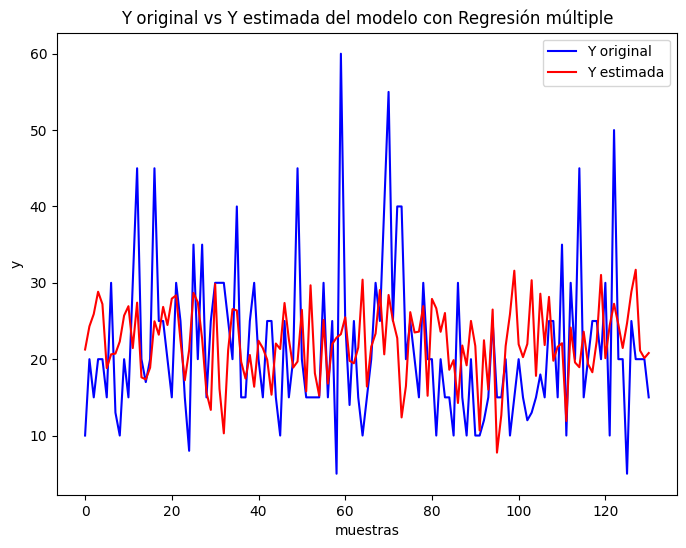

In [ ]:
fig = plt.figure(figsize=(8,6))
line_1 = plt.plot(np.arange(len(Y_test)), Y_test, 
                  color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(y_regression)), y_regression, 
                  color = 'r', label='Y estimada') 

plt.legend()
plt.title('Y original vs Y estimada del modelo con Regresión múltiple') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

### Random forest

In [ ]:
secuencial_ascendente(rf)

Número de características:  2
Index(['Q.17. ', 'Q.18. '], dtype='object')


In [ ]:
datos_seleccion_rf = datos_no_atipicos[['Q.17. ', 'Q.18. ']]

In [ ]:
scaler = StandardScaler()
scaler.fit(datos_seleccion_rf)

StandardScaler()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(datos_seleccion_rf, salida_2, test_size=0.2)

In [ ]:
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

In [ ]:
parameters = {
            'n_estimators' : [25, 50, 75],
            'max_depth' : [6,12,18]
             }
grid_search_cv = GridSearchCV(RandomForestRegressor(), parameters)
grid_search_cv.fit(X_train_scaled, Y_train)
grid_search_cv.best_params_

{'max_depth': 12, 'n_estimators': 75}

In [ ]:
rf = RandomForestRegressor(n_estimators=75,
                          max_depth=12, random_state=0)
rf.fit(X_train_scaled, Y_train)
y_rf = rf.predict(X_test_scaled)

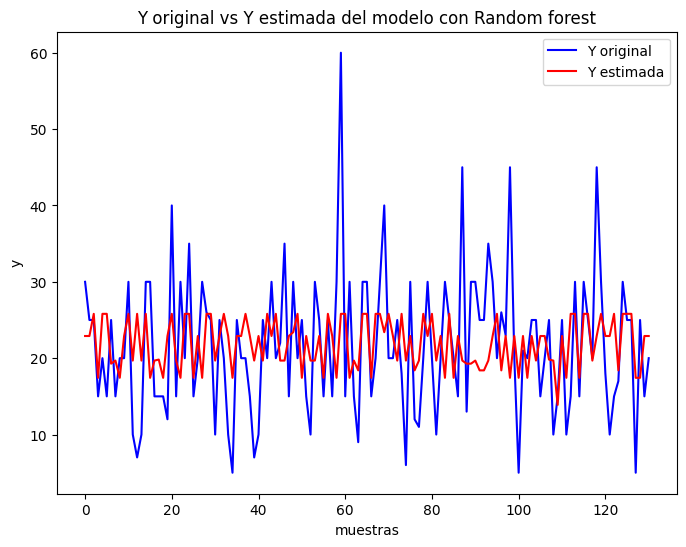

In [ ]:
fig = plt.figure(figsize=(8,6))
line_1 = plt.plot(np.arange(len(Y_test)), Y_test, 
                  color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(y_rf)), y_rf, 
                  color = 'r', label='Y estimada') 

plt.legend()
plt.title('Y original vs Y estimada del modelo con Random forest') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

### Regresión por Vectores de Soporte con kernel RBF

In [ ]:
secuencial_descendente(svm)

Número de características:  18
Index(['z_from_m', 'bMinc', 'bLinc', 'bwork', 'bpribike', 'o_pLU_Hmix',
       'o_bsindex', 'd_i_dens', 'd_km_dens', 'd_LCycle', 'd_Hls', 'r_detour',
       'r_pLU_Hmix', 'r_Lls', 'Q.13.1 Hour', 'Q.13.2 Minutes', 'Q.17. ',
       'Q.18. '],
      dtype='object')


In [ ]:
datos_seleccion_svm = datos_no_atipicos[['z_from_m', 'bMinc', 'bLinc', 'bwork', 'bpribike', 'o_pLU_Hmix',
       'o_bsindex', 'd_i_dens', 'd_km_dens', 'd_LCycle', 'd_Hls', 'r_detour',
       'r_pLU_Hmix', 'r_Lls', 'Q.13.1 Hour', 'Q.13.2 Minutes', 'Q.17. ',
       'Q.18. ']]

In [ ]:
scaler = StandardScaler()
scaler.fit(datos_seleccion_svm)

StandardScaler()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(datos_seleccion_svm, salida_2, test_size=0.2)

In [ ]:
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

In [ ]:
parameters = {
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01,0.1, 10],
    'C': [0.1, 1.0],
    'epsilon': [0.004, 0.008, 0.0004, 0.0008]
    }
grid_search_cv = GridSearchCV(SVR(), parameters, cv=3)
grid_search_cv.fit(X_train_scaled, Y_train)
grid_search_cv.best_params_

{'C': 1.0, 'epsilon': 0.0004, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
svm = SVR(kernel='rbf', gamma=0.1, C=1.0, epsilon=0.0004)
svm.fit(X_train_scaled, Y_train)
y_svr = svm.predict(X_test_scaled)

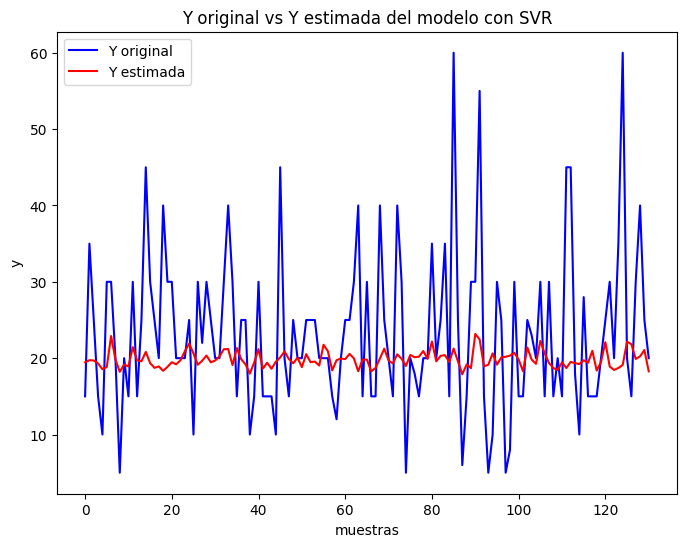

In [ ]:
fig = plt.figure(figsize=(8,6))
line_1 = plt.plot(np.arange(len(Y_test)), Y_test, 
                  color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(y_svr)), y_svr, 
                  color = 'r', label='Y estimada') 

plt.legend()
plt.title('Y original vs Y estimada del modelo con SVR') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

---

### **DESEMPEÑO**

In [ ]:
def desempenio (y_pred):
  mae = mean_absolute_error(Y_test, y_pred)
  mape = mean_absolute_percentage_error(Y_test, y_pred)
  mse = mean_squared_error(Y_test, y_pred)
  rmse = mean_squared_error(Y_test, y_pred, squared=False)
  r2 = r2_score(Y_test, y_pred)

  print("MAE: ", mae)
  print("MAPE", mape)
  print("MSE", mse)
  print("RMSE", rmse)
  print("R2", r2)

In [ ]:
desempenio(y_regression)

MAE:  9.151253715419163
MAPE 0.4974389103962601
MSE 143.09511845009624
RMSE 11.962237184159836
R2 -0.31986587061676985


In [ ]:
desempenio(y_rf)

MAE:  8.232931196381504
MAPE 0.4463142356025233
MSE 121.323339357736
RMSE 11.0146874380409
R2 -0.1190495990495779


In [ ]:
desempenio(y_svr) 

MAE:  7.738429716921796
MAPE 0.3904198759858687
MSE 115.63776998451246
RMSE 10.75350035962767
R2 -0.06660763560580896


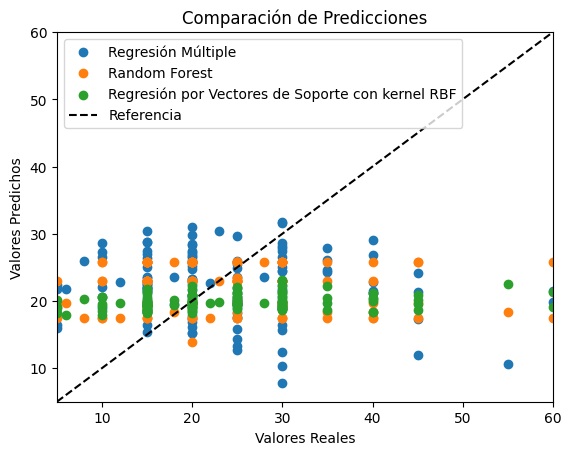

In [ ]:
fig, ax = plt.subplots()

y_ref = np.linspace(min(Y_test), max(Y_test), 100)

ax.scatter(Y_test, y_regression, label='Regresión Múltiple')
ax.scatter(Y_test, y_rf, label='Random Forest')
ax.scatter(Y_test, y_svr, label='Regresión por Vectores de Soporte con kernel RBF')

ax.plot(y_ref, y_ref, color='black', linestyle='--', label='Referencia')

# Configurar etiquetas y título del gráfico
ax.set_xlabel('Valores Reales')
ax.set_ylabel('Valores Predichos')
ax.set_title('Comparación de Predicciones')

# Mostrar la leyenda
ax.legend()

# Ajustar los límites del eje x e y para una mejor visualización
ax.set_xlim(min(Y_test), max(Y_test))
ax.set_ylim(min(Y_test), max(Y_test))

# Mostrar la gráfica
plt.show()

In [ ]:
y_regression_list = y_regression.tolist()
y_rf_list = y_rf.tolist()
y_svr_list = y_svr.tolist()
y_test_array = Y_test.tolist()

print(y_regression_list)
print(y_rf_list)
print(y_svr_list)
print(y_test_array)






[21.264896540971602, 24.302392012038, 25.912104650053667, 28.83011297742117, 27.20998066232348, 18.829650942623864, 20.636829004138466, 20.731712927239666, 22.30995749977338, 25.711272032795055, 26.937039162910374, 21.455302398156537, 27.404278174483313, 17.623702306990545, 17.346556465054377, 18.887085983429966, 24.96798408136113, 23.20515536198907, 26.848735000656053, 24.474059662116463, 27.932881659065824, 28.353481676128084, 22.48201334243906, 17.239640397614778, 21.190198474891968, 28.68139349356451, 27.44285066334266, 22.645913342817153, 15.602691090771852, 13.360237901198253, 29.856153559413453, 16.124027299300284, 10.288299992107973, 21.221970328064746, 26.552439119993416, 26.38834507147932, 19.65629117499272, 17.458974530245513, 20.54731227858714, 16.393256379681976, 22.413553281462793, 21.44264399765886, 19.939557766922523, 15.345087735105842, 22.050893644823716, 21.333204335971345, 27.35918912749522, 22.60735002019053, 18.902612491761015, 19.68744507897537, 26.46640225049218

## **Seleccion PCA**

In [ ]:
scaler = StandardScaler()
scaler.fit(datos_no_atipicos)

StandardScaler()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(datos_no_atipicos,salida_2, test_size=0.2)

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=0.95, svd_solver='full')

pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## Modelos con PCA

### Regresion multiple

In [ ]:
regression = LinearRegression()
regression.fit(X_train_pca, Y_train)
y_regression = regression.predict(X_test_pca)

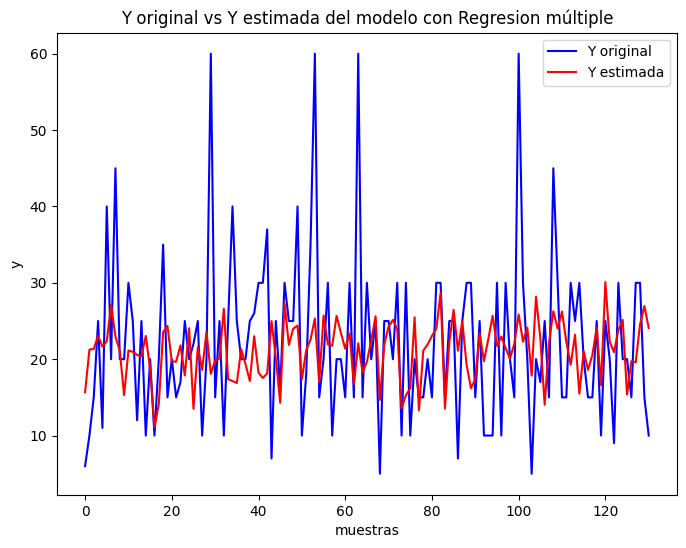

In [ ]:
fig = plt.figure(figsize=(8,6))
# plt.axhline(0, color="black")
line_1 = plt.plot(np.arange(len(Y_test)), Y_test, 
                  color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(y_regression)), y_regression, 
                  color = 'r', label='Y estimada') 

plt.legend()
plt.title('Y original vs Y estimada del modelo con Regresion múltiple') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

### Ventana de Parzen

In [ ]:
from scipy.spatial.distance import euclidean

def kernel_gaussiano(x):
    return (np.exp((-0.5)*x**2))

def ventana_parzen(xi, X, h, Y=None):
    nro_muestras = X.shape[0]
    suma = 0
    for k in range(nro_muestras):
        u = euclidean(xi, X[k,:])
        if Y is None:
            suma += kernel_gaussiano(u/h)
        else:
            suma += kernel_gaussiano(u/h)*Y[k]
    
    return suma

def Nadaraya_Watson(h, Xtrain, Ytrain, Xtest):
    Xtrain = np.array(Xtrain)
    Xtest = np.array(Xtest)
    Ytrain = np.array(Ytrain)

    Ypred = np.zeros(Xtest.shape[0])

    for i in range(len(Xtest)):
      Ypred[i] = ventana_parzen(Xtest[i], Xtrain, h, Ytrain) / ventana_parzen(Xtest[i], Xtrain, h)
    
    return Ypred

In [ ]:
y_parzen = Nadaraya_Watson(0.5, X_train_pca, Y_train, X_test_pca)

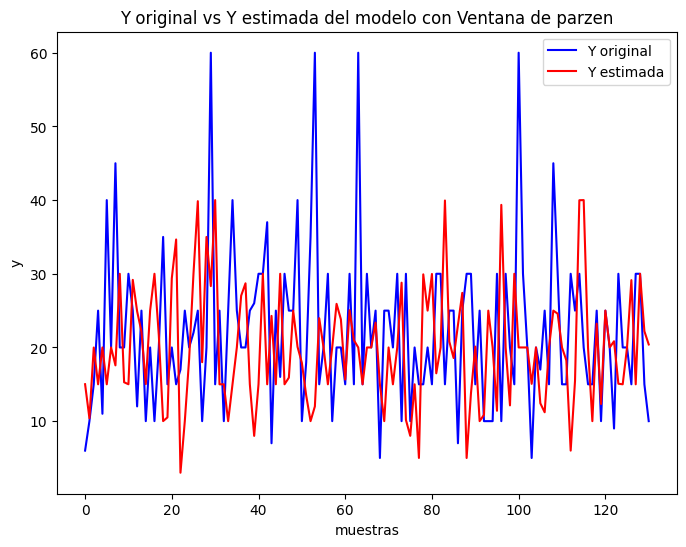

In [ ]:
fig = plt.figure(figsize=(8,6))
line_1 = plt.plot(np.arange(len(Y_test)), Y_test, 
                  color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(y_parzen)), y_parzen, 
                  color = 'r', label='Y estimada') 

plt.legend()
plt.title('Y original vs Y estimada del modelo con Ventana de parzen') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

### Random forest

Mejores parametros

In [ ]:
parameters = {
            'n_estimators' : [25, 50, 75],
            'max_depth' : [6,12,18]
             }
grid_search_cv = GridSearchCV(RandomForestRegressor(), parameters)
grid_search_cv.fit(X_train_pca, Y_train)
grid_search_cv.best_params_

{'max_depth': 6, 'n_estimators': 75}

In [ ]:
rf = RandomForestRegressor(n_estimators=75,
                          max_depth=6, random_state=0)
rf.fit(X_train_pca, Y_train)
y_rf = rf.predict(X_test_pca)

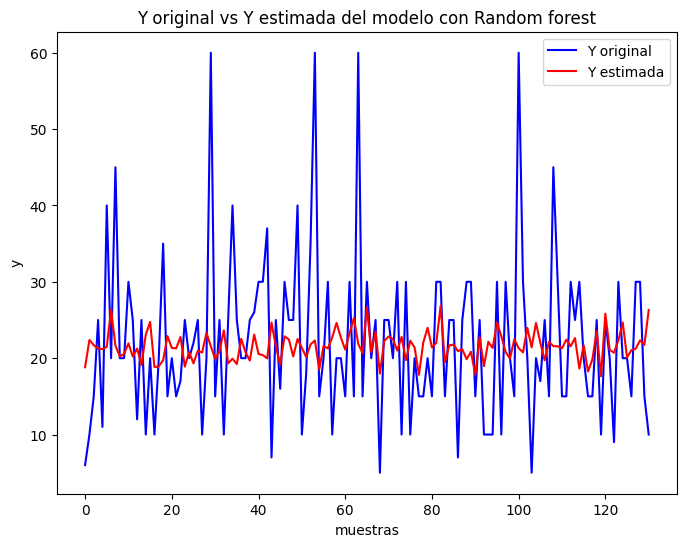

In [ ]:
fig = plt.figure(figsize=(8,6))
line_1 = plt.plot(np.arange(len(Y_test)), Y_test, 
                  color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(y_rf)), y_rf, 
                  color = 'r', label='Y estimada') 

plt.legend()
plt.title('Y original vs Y estimada del modelo con Random forest') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

### Redes Neuronales Artificiales

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_pca, Y_train, epochs=100, batch_size=32, verbose=0)

y_rna = model.predict(X_test_pca).flatten()

5/5 [==============================] - 0s 1ms/step


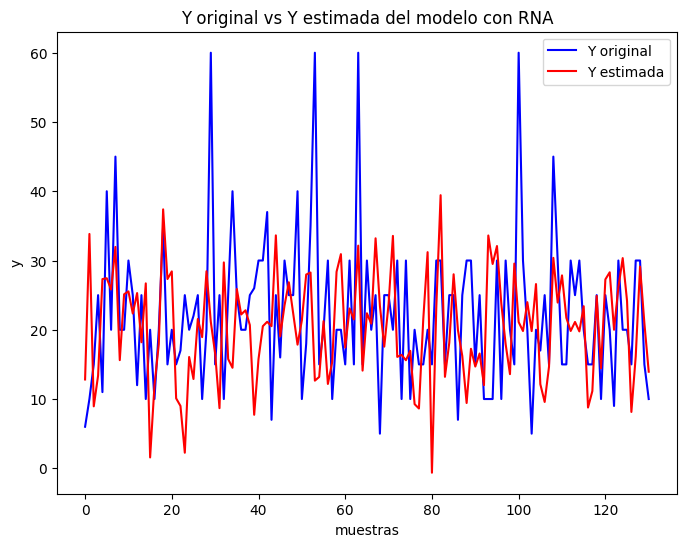

In [ ]:
fig = plt.figure(figsize=(8,6))
line_1 = plt.plot(np.arange(len(Y_test)), Y_test, 
                  color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(y_rna)), y_rna, 
                  color = 'r', label='Y estimada') 

plt.legend()
plt.title('Y original vs Y estimada del modelo con RNA') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

### Regresión por Vectores de Soporte con kernel RBF

Mejores parametros

In [ ]:
parameters = {
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01,0.1],
    'C': [0.1, 1.0,10],
    'epsilon': [0.004, 0.008, 0.0004, 0.0008]
             }
grid_search_cv = GridSearchCV(SVR(), parameters)
grid_search_cv.fit(X_train_pca, Y_train)
grid_search_cv.best_params_

{'C': 1.0, 'epsilon': 0.008, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
svm = make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma=0.01, C=1.0, epsilon=0.008))
svm.fit(X_train_pca, Y_train)
y_svr = svm.predict(X_test_pca)

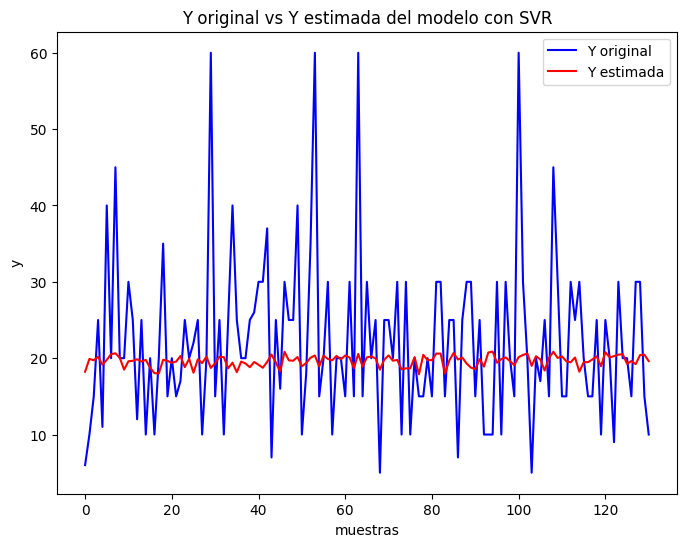

In [ ]:
fig = plt.figure(figsize=(8,6))
line_1 = plt.plot(np.arange(len(Y_test)), Y_test, 
                  color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(y_svr)), y_svr, 
                  color = 'r', label='Y estimada') 

plt.legend()
plt.title('Y original vs Y estimada del modelo con SVR') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

---

### **DESEMPEÑO**

In [ ]:
def desempenio (y_pred):
  mae = mean_absolute_error(Y_test, y_pred)
  mape = mean_absolute_percentage_error(Y_test, y_pred)
  mse = mean_squared_error(Y_test, y_pred)
  rmse = mean_squared_error(Y_test, y_pred, squared=False)
  r2 = r2_score(Y_test, y_pred)

  print("MAE: ", mae)
  print("MAPE", mape)
  print("MSE", mse)
  print("RMSE", rmse)
  print("R2", r2)

In [ ]:
desempenio(y_regression)

MAE:  7.961458585412256
MAPE 0.443826932179541
MSE 114.3910768961313
RMSE 10.695376426107279
R2 0.004481322796716647


In [ ]:
desempenio(y_parzen)

MAE:  10.926901779038863
MAPE 0.5690396348285701
MSE 198.45961218152112
RMSE 14.08756942064603
R2 -0.7271473960912274


In [ ]:
desempenio(y_rf)

MAE:  8.00533098778711
MAPE 0.4664298461163661
MSE 116.67651624593958
RMSE 10.801690434646773
R2 -0.015408319123652703


In [ ]:
desempenio(y_rna)

MAE:  9.557565082575529
MAPE 0.5343722880637556
MSE 152.1314616804431
RMSE 12.334158328821756
R2 -0.3239643825596221


In [ ]:
desempenio(y_svr) 

MAE:  7.834223058033143
MAPE 0.4198050672774062
MSE 118.94060674047843
RMSE 10.90598948928883
R2 -0.03511216697044284


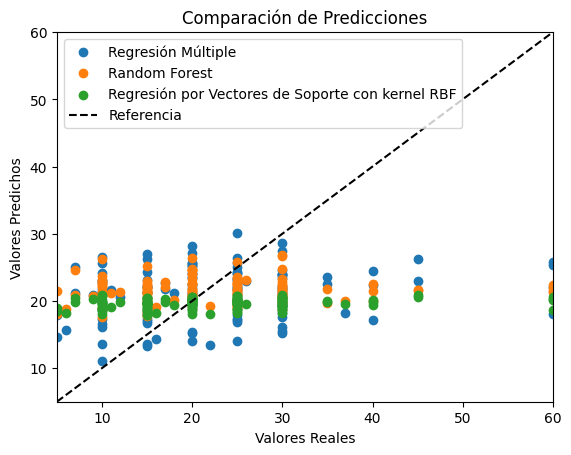

In [ ]:
fig, ax = plt.subplots()

y_ref = np.linspace(min(Y_test), max(Y_test), 100)

ax.scatter(Y_test, y_regression, label='Regresión Múltiple')
ax.scatter(Y_test, y_rf, label='Random Forest')
ax.scatter(Y_test, y_svr, label='Regresión por Vectores de Soporte con kernel RBF')

ax.plot(y_ref, y_ref, color='black', linestyle='--', label='Referencia')

# Configurar etiquetas y título del gráfico
ax.set_xlabel('Valores Reales')
ax.set_ylabel('Valores Predichos')
ax.set_title('Comparación de Predicciones')

# Mostrar la leyenda
ax.legend()

# Ajustar los límites del eje x e y para una mejor visualización
ax.set_xlim(min(Y_test), max(Y_test))
ax.set_ylim(min(Y_test), max(Y_test))

# Mostrar la gráfica
plt.show()

In [ ]:
y_regression_list = y_regression.tolist()
y_parzen_list = y_parzen.tolist()
y_rf_list = y_rf.tolist()
y_rna_list = y_rna.tolist()
y_svr_list = y_svr.tolist()
y_test_array = Y_test.tolist()

print(y_regression_list)
print(y_parzen_list)
print(y_rf_list)
print(y_rna_list)
print(y_svr_list)
print(y_test_array)






[15.679179603185464, 21.25533882996756, 21.347264700491685, 23.057329084719086, 21.64193578486436, 22.327610064346025, 27.10195641327156, 22.961839160564093, 21.102434067168918, 15.287853081642302, 21.142085897721387, 20.964018300122063, 20.56341041091395, 20.41357505834804, 23.04612627528575, 18.727823253592877, 11.094353237543242, 14.08875715934049, 23.551772239138522, 24.36205557301412, 19.699535325490256, 19.678882712054598, 21.800638594502733, 17.861364191456527, 24.056586640505557, 13.49709633823397, 21.591853914348825, 18.59989970680594, 23.561057094644255, 18.077783657842065, 19.81281550044382, 20.080133039906606, 26.60705646349096, 17.37473078267596, 17.136522981749675, 16.8786099960486, 21.304682772066382, 19.34419882796909, 17.14248126485947, 23.002976444415623, 18.23150345258528, 17.541864522014922, 18.136586569006525, 24.98495009264652, 20.124916435199363, 14.291451967883273, 27.361469192222753, 21.856069779716083, 23.99253175580832, 24.397673210811313, 17.356512450772314,